<a href="https://colab.research.google.com/github/phoid/Data-Exploration/blob/main/CS_Dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import urllib.parse

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap

In [ ]:
# address = 'Shivaji Nagar, Bangalore, KA 560001'
# url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'

# response = requests.get(url).json()
# print(response[0]["lat"])
# print(response[0]["lon"])

In [ ]:
excel_data = '/content/Colorado Springs December Crime Data.xlsx'
data = pd.read_excel(excel_data, dtype="string")


In [ ]:
# Change names to be proper and easier to reference
data.rename(columns = {'Day of the Week':'DoW', 'Unnamed: 5': 'Lat_Long', 'Address': 'Address'}, inplace = True)
data

,Class,Date,Time,Address,DoW,Lat_Long
0,Simple Assault,2022-12-20 00:00:00,2100,100 N Brentwood Dr,Tuesday,"38.83420333695532, -104.77084870223256"
1,Theft,2022-12-20 00:00:00,1400,4500 Edison Ave,Tuesday,"38.84038642293159, -104.74420434456012"
2,Theft,2022-12-20 00:00:00,1300,3400 Galley Rd,Tuesday,"38.847283500399186, -104.76754554455992"
3,Commercial Burglary,2022-12-20 00:00:00,0,1200 Lake Plaza Dr,Tuesday,"38.79326562831142, -104.80467950223384"
4,Simple Assault,2022-12-19 00:00:00,2100,3000 Mallard Dr,Monday,"38.818205579582994, -104.7729225868886"
...,...,...,...,...,...,...
372,Commercial Robbery,2022-12-01 00:00:00,800,700 S Academy Blvd,Thursday,"38.82207696503992, -104.75771017381574"
373,Residential Burglary,2022-12-01 00:00:00,700,2200 Patrician Way,Thursday,"38.86322582561086, -104.7841348445594"
374,Motor Vehicle Theft,2022-12-01 00:00:00,600,4400 Fountain Spring Grv,Thursday,"38.809015760582305, -104.74464674456112"
375,Commercial Robbery,2022-12-01 00:00:00,200,2800 S Circle Dr,Thursday,"38.7958973857239, -104.79033004498561"


In [ ]:
data['Class'] = data['Class'].astype('category')
data['Time'] = data['Time'].astype('category')

In [ ]:
data_test = data
data_test[['lat','long']] = data.Lat_Long.str.split(",", expand=True)


In [ ]:
data_test['lat'] = data['lat'].astype('float64')
data_test['long'] = data['long'].astype('float64')
del(data_test['Lat_Long'])

In [ ]:
crimes = data_test
crimes.head()

,Class,Date,Time,Address,DoW,lat,long
0,Simple Assault,2022-12-20 00:00:00,2100,100 N Brentwood Dr,Tuesday,38.834203,-104.770849
1,Theft,2022-12-20 00:00:00,1400,4500 Edison Ave,Tuesday,38.840386,-104.744204
2,Theft,2022-12-20 00:00:00,1300,3400 Galley Rd,Tuesday,38.847284,-104.767546
3,Commercial Burglary,2022-12-20 00:00:00,0,1200 Lake Plaza Dr,Tuesday,38.793266,-104.804680
4,Simple Assault,2022-12-19 00:00:00,2100,3000 Mallard Dr,Monday,38.818206,-104.772923


In [ ]:
enb_ctrl = True
map = folium.Map(location=[38.8397898755016, -104.75744935109682],tiles="Stamen Terrain",zoom_start=15, zoom_control=enb_ctrl,scrollWheelZoom=enb_ctrl,dragging=enb_ctrl) # tiles="Stamen Terrain"

for index, row in data.iterrows():
    if not np.isnan(row[5]): # in this example if lat is NaN, Long is NaN as well
        folium.CircleMarker(location=[row[5], row[6]], radius=1, color='black', tooltip=row[0] + ' on ' + row[3] + ' at ' + row[4]).add_to(map)

#map

In [ ]:
dd = crimes.dropna(subset=["lat"])
heat_data = [[row['lat'],row['long']] for index, row in dd.iterrows()]
listDef = [[1,2,3],[1,2,3],3,4,5]
heat_data

[[38.83420333695532, -104.77084870223256],
 [38.84038642293159, -104.74420434456012],
 [38.847283500399186, -104.76754554455992],
 [38.79326562831142, -104.80467950223384],
 [38.818205579582994, -104.7729225868886],
 [38.87148288556706, -104.70802730223136],
 [38.81405095753654, -104.74919024456098],
 [38.83249559473247, -104.82363065990485],
 [38.855250514874164, -104.87568715805129],
 [38.84000980950621, -104.77091078688791],
 [38.84000980950621, -104.77091078688791],
 [38.866690618904734, -104.81172221757595],
 [38.832625437140784, -104.78661607339647],
 [38.80626684023908, -104.77171493106954],
 [38.84444295489896, -104.85813321572388],
 [38.85635401526291, -104.74822645990406],
 [38.83840720894197, -104.78733394456019],
 [38.821379902947015, -104.81343545805234],
 [38.858516725058365, -104.72592897339563],
 [38.82557392119472, -104.75202314456052],
 [38.8331793370758, -104.80075797339653],
 [38.82679292133762, -104.82191405805224],
 [38.840971266422166, -104.70835917339622],
 [38.

In [ ]:
HeatMap(heat_data).add_to(map)
map

In [ ]:
pie = crimes['Class'].value_counts()


In [ ]:
# from matplotlib import pyplot as plt
# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True

# day = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
# issues_addressed = [10, 14, 0, 10, 15, 15]
# issues_pending = [5, 10, 50, 2, 0, 10]

# b1 = plt.barh(year, issues_addressed, color="red")

# b2 = plt.barh(year, issues_pending, left=issues_addressed, color="yellow")

# plt.legend([b1, b2], ["Completed", "Pending"], title="Issues", loc="upper right")

# plt.show()

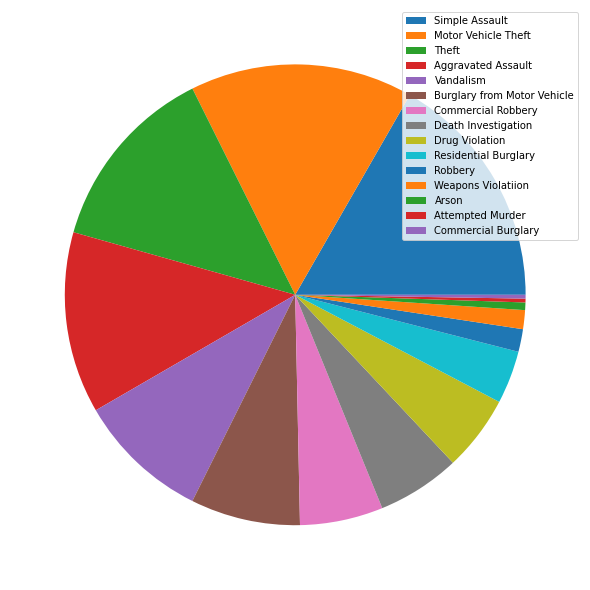

In [ ]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_axes((0,0,.5,1))

data2 = data.loc[data["Class"] != 'Commercial Burglary']
pieData = data['Class'].value_counts()

ax.pie(data2['Class'].value_counts());  # Plot some data on the axes.
plt.legend(data['Class'].value_counts().keys(), loc="upper right")

plt.show()

In [ ]:
d = pd.crosstab(index=crimes['DoW'], columns=data['Time'].str.replace(r'00\Z','', regex=True))

In [ ]:

d = d.reindex(columns=['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])
d = d.reindex(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

d

Time,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DoW,,,,,,,,,,,,,,,,,,,,,
Sunday,2,1,2,3,0,4,0,0,2,3,...,3,3,1,4,2,3,4,6,2,1
Monday,3,1,2,1,3,0,2,3,2,0,...,4,2,5,3,3,2,4,1,2,1
Tuesday,3,2,1,1,0,0,1,0,0,2,...,4,2,2,9,5,1,2,2,2,2
Wednesday,5,2,0,1,0,1,0,1,2,1,...,2,3,5,3,4,3,6,3,2,1
Thursday,2,2,2,0,1,3,1,4,6,1,...,2,0,5,2,0,4,3,3,4,1
Friday,8,1,5,0,0,1,1,1,3,6,...,1,5,0,5,4,7,6,1,5,3
Saturday,4,0,1,2,0,1,2,3,0,1,...,3,1,0,4,8,4,5,1,2,1


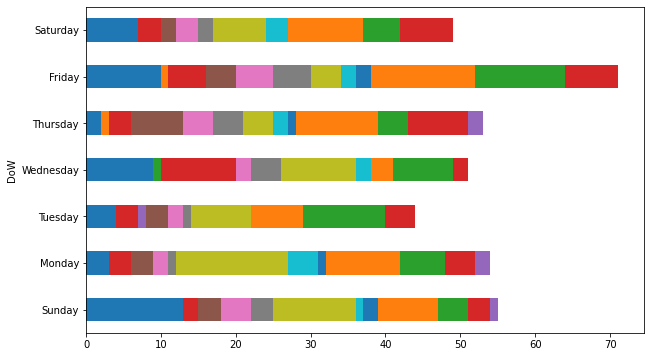

In [ ]:
bar = pd.crosstab(index=crimes['DoW'], columns=data['Class'])
bar = bar.reindex(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

ax = bar.plot.barh(stacked=True, rot=0, legend=False, grid=False, figsize=(10,6))

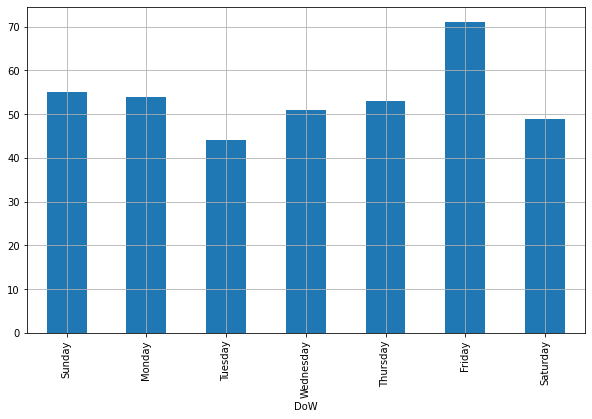

In [ ]:
#calculate sum of values by group
df_groups = data.groupby(['DoW'])['Class'].count()
df_groups = df_groups.reindex(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
df_groups
#create bar plot by group
df_groups.plot(kind='bar', figsize=(10,6), grid=True)
# data.groupby('DoW').Class.value_counts().unstack().plot.bar()